<a href="https://colab.research.google.com/github/sonicfsw/Check_ULP-R-_722-1/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%22%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RandomForest

## **Разница между случайными лесами и деревьями решений**

Сравнение случайных лесов и деревьев решений показывает следующие ключевые различия:

1. Случайный лес — это набор из нескольких деревьев решений.  
2. Дерья решений работают быстрее с точки зрения вычислений по сравнению со случайными лесами.  
3. Глубокие деревья решений могут страдать от переобучения. Случайный лес предотвращает переобучение, создавая деревья на случайных подвыборках данных.  
4. Случайный лес сложно интерпретировать, в то время как дерево решений легко понять и преобразовать в правила.

## **Связь с методом ближайших соседей**

Связь между случайными лесами и алгоритмом k-ближайших соседей была описана Лин и Чжоном в 2002 году. Оба метода можно рассматривать как "схемы взвешенных соседств". Эти модели строятся на основе обучающей выборки и делают прогнозы для новых точек, анализируя их окружение, формализованное с помощью весовой функции.

## **Импорт библиотек**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


In [ ]:
import warnings

warnings.filterwarnings('ignore')

## **Импорт набора данных**


In [ ]:
import kagglehub

path = kagglehub.dataset_download("elikplim/car-evaluation-data-set")

print("Path to dataset files:", path)

100%|██████████| 4.66k/4.66k [00:00<00:00, 10.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/elikplim/car-evaluation-data-set/versions/1


In [ ]:
data = '/root/.cache/kagglehub/datasets/elikplim/car-evaluation-data-set/versions/1/car_evaluation.csv'

df = pd.read_csv(data, header=None)

## **Исследовательский анализ данных**

В рамках этой практики проведён анализ данных для получения дополнительной информации.  

In [ ]:
df.shape

(1728, 7)

Набор данных содержит 1728 записей и 7 переменных.


#### Просмотр первых 5 строк набора данных


In [ ]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### Переименование столбцов

Обнаружено, что столбцы набора данных неправильно названы — они обозначены цифрами 0, 1, 2 и так далее.

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Столбцы переименованы, чтобы получить осмысленные названия.

#### Просмотр описательной статистики набора данных


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#### Распределение частот значений переменных

Проверено распределение частот для категориальных переменных.

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())


buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


Выявлено, что переменные `doors` и `persons` являются категориальными, и они обработаны как категориальные данные.

#### Сводная информация по переменным

- В наборе данных 7 переменных, все они являются категориальными.  
- Названия переменных: `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` и `class`.  
- Целевая переменная — `class`.

#### Анализ переменной `class`


In [ ]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


Целевая переменная `class` определена как порядковая.  

#### Пропущенные значения в переменных


In [ ]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


Пропущенные значения в наборе данных отсутствуют, что подтверждено анализом распределения частот.

## **Определение признаков и целевой переменной**


In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

## **Разделение данных на обучающую и тестовую выборки**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [ ]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

## **Feature Engineering** <a class="anchor" id="12"></a>

**Feature Engineering** проведена для преобразования исходных данных в полезные признаки, которые повышают точность модели.  
Категориальные переменные закодированы, что позволило подготовить обучающую и тестовую выборки для построения модели.

In [ ]:
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [ ]:
%pip install --upgrade category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [ ]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


Категориальные переменные закодированы, что позволило подготовить обучающую и тестовую выборки для построения модели.

## **Модель случайного леса с параметрами по умолчанию**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(random_state=0)


rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_test)


from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9457


Построена модель случайного леса с параметром `n_estimators = 10`. Для построения модели использовано 10 деревьев решений. Далее увеличено количество деревьев для анализа влияния этого параметра на точность модели.

## **Модель случайного леса с параметром n_estimators=100**

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)


rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)


print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


Точность модели с 10 деревьями решений составила 0.9457, а с 100 деревьями — 0.9457.

## **Определение важных признаков с помощью случайного леса**


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [ ]:

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
safety,0.295319
persons,0.233856
buying,0.151734
maint,0.146653
lug_boot,0.100048
doors,0.072389


В рамках анализа выбраны только важные признаки. Наиболее важным признаком оказался `safety`, а наименее важным — `doors`.

## **Визуализация значений важности признаков**

С помощью matplotlib и seaborn визуализированы значения важности признаков.

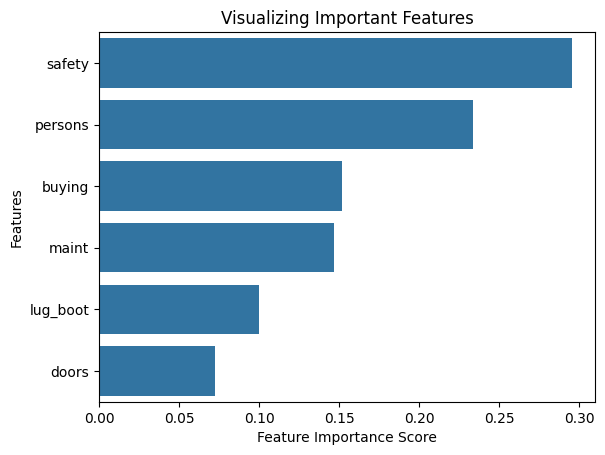

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)


plt.xlabel('Feature Importance Score')

plt.ylabel('Features')


plt.title("Visualizing Important Features")



plt.show()

## **Построение модели случайного леса на основе выбранных признаков**

Исключён наименее важный признак `doors`, после чего модель была перестроена.

In [ ]:
X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
clf = RandomForestClassifier(random_state=0)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with doors variable removed : 0.9264


Точность модели без признака `doors` составила 0.9264, тогда как с учётом всех признаков — 0.9457. Это показывает ухудшение точности после исключения признака `doors`.


## **Матрица ошибок**


In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


## **Classification Report** <a class="anchor" id="19"></a>


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



## **Итоги и выводы**

1. В этой практике построен классификатор случайного леса для предсказания безопасности автомобиля. Созданы две модели: с 10 деревьями решений и с 100 деревьями решений.  
2. Точность модели с 10 деревьями составила 0.9457, а с 100 деревьями — 0.9457.  
3. Определены важные признаки, среди которых наиболее значимым оказался `safety`, а наименее важным — `doors`.  
4. Удаление признака `doors` увеличило точность модели до 0.9264.  
5. Удаление признака `lug_boot` значительно снизило точность до 0.8546, поэтому его исключение оказалось нецелесообразным.  
6. Матрица ошибок и отчёт классификации показали высокую точность и надёжность модели.  

# XGBoost

## **Extreme Gradient Boosting (XGBoost)**

XGBoost — это одна из самых быстрых реализаций метода градиентного бустинга на деревьях решений. Его высокая скорость достигается за счёт решения одной из основных проблем градиентного бустинга:

- При наличии тысяч признаков существует множество возможных разбиений для создания новых ветвей дерева. Анализ всех этих разбиений и потерь требует значительных вычислительных ресурсов.  
- XGBoost оптимизирует этот процесс, анализируя распределение признаков на всех данных в листе дерева, что позволяет сузить пространство поиска возможных разбиений.  
- Несмотря на наличие других методов регуляризации, именно эта оптимизация обеспечивает высокую скорость работы XGBoost, позволяя быстро исследовать различные настройки гиперпараметров.  
- Это особенно полезно, так как в XGBoost множество гиперпараметров, направленных на предотвращение переобучения.

### **Импорт библиотек**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import os



### **Загрузка набора данных**


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("binovi/wholesale-customers-data-set")

print("Path to dataset files:", path)

100%|██████████| 6.85k/6.85k [00:00<00:00, 3.82MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/binovi/wholesale-customers-data-set/versions/1


In [ ]:
data = '/root/.cache/kagglehub/datasets/binovi/wholesale-customers-data-set/versions/1/Wholesale customers data.csv'

df = pd.read_csv(data)

### **EDA** <a class="anchor" id="4.3"></a>


#### **Вид данных** <a class="anchor" id="4.3.1"></a>


In [ ]:
df.shape

(440, 8)

Проведён анализ формы данных: набор данных содержит 440 записей и 8 признаков.  

#### **Предварительный просмотр данных**


In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Видно, что переменная `Channel` принимает значения 1 и 2, которые классифицируют клиентов следующим образом:
- 1 — Horeca (Hotel/Retail/Café),
- 2 — Розничный канал (Retail).  

#### **О данных**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Все переменные набора данных являются числовыми.  


#### **Описательная статистика набора данных**


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### **Проверка на пропущенные значения**


In [ ]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


Пропущенных значений в наборе данных не обнаружено.


### **Определение вектора признаков и целевой переменной**

In [ ]:
X = df.drop('Channel', axis=1)

y = df['Channel']

In [ ]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [ ]:
y.head()

,Channel
0,2
1,2
2,2
3,1
4,2


In [ ]:
y[y == 2] = 0

y[y == 1] = 1

In [ ]:

y.head()

,Channel
0,0
1,0
2,0
3,1
4,0


In [ ]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X,label=y)

Определены вектор признаков (X) и целевая переменная (y). Метки целевой переменной преобразованы из значений 1 и 2 в 0 и 1 для дальнейшего анализа.  
Данные преобразованы в оптимизированную структуру **DMatrix**, которая поддерживается XGBoost и повышает производительность.

### **Разделение данных на обучающую и тестовую выборки**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### **Обучение классификатора XGBoost**

Для обучения классификатора XGBoost рассмотрены параметры модели. Подготовлено обучение и настройка гиперпараметров.  

In [ ]:
from xgboost import XGBClassifier


params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }


xgb_clf = XGBClassifier(**params)


xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:

print(xgb_clf)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


### **Прогнозирование с использованием XGBoost**


In [ ]:
y_pred = xgb_clf.predict(X_test)

### **Оценка точности модели**


In [ ]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8788


Модель XGBoost достигла высокой точности 0.87%.


## **k-fold Cross Validation в XGBoost**

Для повышения надёжности модели применена k-кратная кросс-валидация.  
Методика обеспечивает использование данных как для обучения, так и для проверки, где каждая запись проверяется только один раз.  
Параметры для кросс-валидации включают:
- **nfolds** — количество наборов кросс-валидации,  
- **num_boost_round** — количество деревьев,  
- **metrics** — метрика оценки,  
- **as_pandas** — возврат результатов в формате DataFrame,  
- **early_stopping_rounds** — досрочная остановка обучения при отсутствии улучшений,  
- **seed** — воспроизводимость результатов.  

На основе кросс-валидации проведён анализ метрик для каждого этапа обучения.

In [ ]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [ ]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.668359,0.024161,0.608504,0.032623
1,0.668915,0.023947,0.608712,0.032715
2,0.929184,0.014786,0.891158,0.033113
3,0.933945,0.012181,0.890108,0.030048
4,0.958340,0.004118,0.934210,0.011683


## **Анализ важности признаков в XGBoost**

XGBoost предоставляет способ анализа важности признаков. Это достигается путём подсчёта количества разбиений для каждого признака на всех деревьях модели.  


Для визуализации используется функция **plot_importance()**, которая позволяет:
- увидеть распределение важности признаков,  
- определить, какие признаки имеют наибольшее значение.  
Наибольшую важность получил признак `Delicatessen`. На основе анализа возможна отборка наиболее значимых признаков и исключение избыточных.

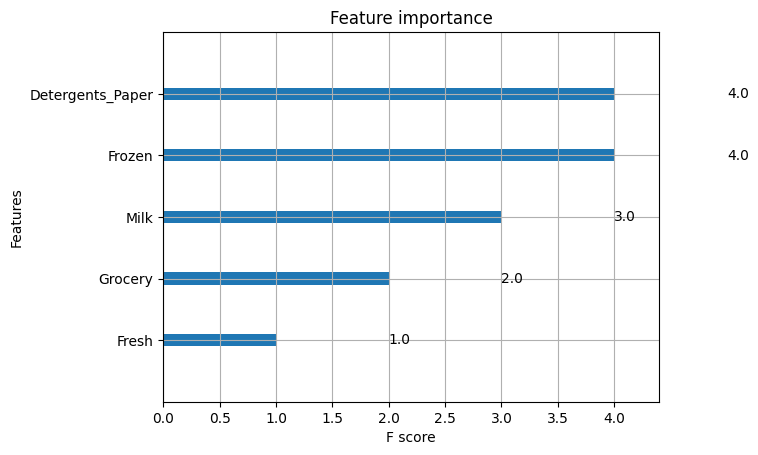

<Figure size 1600x1200 with 0 Axes>

In [ ]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

## **Итоги и выводы**

1. Реализован XGBoost для классификации клиентов по каналам Horeca и Retail.  
2. Метки целевой переменной преобразованы в 0 и 1.  
3. Модель обучена и достигла точности 0.87%.  
4. Выполнена k-кратная кросс-валидация.  
5. Проведён анализ важности признаков с помощью функции **plot_importance()**. Признак `Delicatessen` показал наибольшую значимость.  
6. Реализован отбор значимых признаков для оптимизации модели.

# CatBoost

## **Сравнение CatBoost с другими алгоритмами бустинга**

Существует множество библиотек для реализации бустинга, таких как XGBoost, H2O и LightGBM, каждая из которых показывает хорошие результаты на различных задачах машинного обучения.

![Comparision of CatBoost and other Boosting algorithms](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/08/13153401/Screen-Shot-2017-08-13-at-3.33.33-PM-768x443.png)

- Разработчики CatBoost провели сравнение производительности этой библиотеки с конкурентами на стандартных наборах данных.  
- Сравнение демонстрирует значения log-loss на тестовых данных. В большинстве случаев CatBoost показывает наименьшее значение log-loss, что указывает на более высокую точность как для настроенных, так и для моделей с параметрами по умолчанию.  
- Кроме того, CatBoost не требует преобразования набора данных в специфический формат, в отличие от XGBoost и LightGBM.  

#### **Загрузка набора данных**


In [ ]:
import numpy as np
import pandas as pd


import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lucamassaron/amazon-employee-access-challenge")

print("Path to dataset files:", path)

100%|██████████| 1.41M/1.41M [00:00<00:00, 115MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lucamassaron/amazon-employee-access-challenge/versions/1


In [ ]:
train_df = pd.read_csv('/root/.cache/kagglehub/datasets/lucamassaron/amazon-employee-access-challenge/versions/1/train.csv')

In [ ]:
test_df = pd.read_csv('/root/.cache/kagglehub/datasets/lucamassaron/amazon-employee-access-challenge/versions/1/test.csv')

### **EDA** <a class="anchor" id="4.3"></a>



#### **Просмотр данных**

In [ ]:
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
test_df.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                58921 non-null  int64
 1   RESOURCE          58921 non-null  int64
 2   MGR_ID            58921 non-null  int64
 3   ROLE_ROLLUP_1     58921 non-null  int64
 4   ROLE_ROLLUP_2     58921 non-null  int64
 5   ROLE_DEPTNAME     58921 non-null  int64
 6   ROLE_TITLE        58921 non-null  int64
 7   ROLE_FAMILY_DESC  58921 non-null  int64
 8   ROLE_FAMILY       58921 non-null  int64
 9   ROLE_CODE         58921 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


In [ ]:
train_df.nunique()

,0
ACTION,2
RESOURCE,7518
MGR_ID,4243
ROLE_ROLLUP_1,128
ROLE_ROLLUP_2,177
ROLE_DEPTNAME,449
ROLE_TITLE,343
ROLE_FAMILY_DESC,2358
ROLE_FAMILY,67
ROLE_CODE,343


In [ ]:
test_df.nunique()

,0
id,58921
RESOURCE,4971
MGR_ID,4689
ROLE_ROLLUP_1,126
ROLE_ROLLUP_2,177
ROLE_DEPTNAME,466
ROLE_TITLE,351
ROLE_FAMILY_DESC,2749
ROLE_FAMILY,68
ROLE_CODE,351


### **Выводы EDA**

- Все признаки являются категориальными.  
- Поскольку категориальные признаки содержат много уникальных значений, вместо one-hot кодирования можно использовать настройку параметра `one_hot_max_size` в зависимости от набора данных.  
- Пропущенных значений в наборе данных не обнаружено.

#### **Подготовка данных**


#### **Определения признаков**

In [ ]:
X = train_df.drop("ACTION", axis=1)
y = train_df["ACTION"]


#### Декларация категориальных признаков

In [ ]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


#### **Разделение данных на обучающую и валидационную выборки**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

#### **Реализация CatBoost**


In [ ]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy', 'F1']
)


clf.fit(X_train, y_train,
        cat_features=cat_features,
        eval_set=(X_val, y_val),
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1, 'custom_loss': ['AUC', 'Accuracy', 'F1']}


#### **Вывод стандартного обучения**


In [ ]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
    custom_loss=['AUC', 'Accuracy', 'F1']
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
)

Learning rate set to 0.5
0:	learn: 0.3971379	test: 0.3960691	best: 0.3960691 (0)	total: 40.1ms	remaining: 361ms
1:	learn: 0.2948071	test: 0.2924021	best: 0.2924021 (1)	total: 94.5ms	remaining: 378ms
2:	learn: 0.2485317	test: 0.2454599	best: 0.2454599 (2)	total: 134ms	remaining: 312ms
3:	learn: 0.2234301	test: 0.2191836	best: 0.2191836 (3)	total: 175ms	remaining: 262ms
4:	learn: 0.1999100	test: 0.1935203	best: 0.1935203 (4)	total: 208ms	remaining: 208ms
5:	learn: 0.1911956	test: 0.1831193	best: 0.1831193 (5)	total: 270ms	remaining: 180ms
6:	learn: 0.1854231	test: 0.1763719	best: 0.1763719 (6)	total: 368ms	remaining: 158ms
7:	learn: 0.1818392	test: 0.1732419	best: 0.1732419 (7)	total: 445ms	remaining: 111ms
8:	learn: 0.1789139	test: 0.1679366	best: 0.1679366 (8)	total: 500ms	remaining: 55.6ms
9:	learn: 0.1777264	test: 0.1656210	best: 0.1656210 (9)	total: 616ms	remaining: 0us

bestTest = 0.1656210392
bestIteration = 9



#### **Прогнозирование модели**


In [ ]:
print(clf.predict(data=X_val))

[1 1 1 ... 1 1 1]


#### **Расчёт метрик**


In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy', 'F1']
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    verbose=True
)

clf.get_best_score()

0:	learn: 0.3969305	test: 0.3945769	best: 0.3945769 (0)	total: 64ms	remaining: 3.13s
1:	learn: 0.2933475	test: 0.2899251	best: 0.2899251 (1)	total: 111ms	remaining: 2.65s
2:	learn: 0.2466417	test: 0.2428163	best: 0.2428163 (2)	total: 147ms	remaining: 2.3s
3:	learn: 0.2142165	test: 0.2071024	best: 0.2071024 (3)	total: 189ms	remaining: 2.17s
4:	learn: 0.1971563	test: 0.1891439	best: 0.1891439 (4)	total: 228ms	remaining: 2.05s
5:	learn: 0.1893637	test: 0.1803756	best: 0.1803756 (5)	total: 272ms	remaining: 1.99s
6:	learn: 0.1834200	test: 0.1736867	best: 0.1736867 (6)	total: 319ms	remaining: 1.96s
7:	learn: 0.1817676	test: 0.1716030	best: 0.1716030 (7)	total: 374ms	remaining: 1.96s
8:	learn: 0.1798745	test: 0.1695556	best: 0.1695556 (8)	total: 431ms	remaining: 1.96s
9:	learn: 0.1771475	test: 0.1655671	best: 0.1655671 (9)	total: 511ms	remaining: 2.04s
10:	learn: 0.1755969	test: 0.1635876	best: 0.1635876 (10)	total: 590ms	remaining: 2.09s
11:	learn: 0.1752024	test: 0.1630648	best: 0.1630648 (

{'learn': {'Accuracy': 0.9485409116917796,
  'F1': 0.9733024599734805,
  'Logloss': 0.16571311150795767},
 'validation': {'Accuracy': 0.9487335978028685,
  'F1': 0.9733587059942912,
  'Logloss': 0.15574698023263986,
  'AUC': 0.8638172564817037}}

#AdaBoost

## **Работа алгоритма AdaBoost**

- Алгоритм работает следующим образом:

  1. Изначально AdaBoost случайным образом выбирает подмножество тренировочных данных.
  
  2. Итеративно обучает модель AdaBoost, выбирая тренировочные данные на основе точности предсказания последней итерации.
  
  3. Присваивает больший вес неправильно классифицированным наблюдениям, чтобы в следующей итерации эти наблюдения имели более высокую вероятность правильной классификации.
  
  4. Также на каждой итерации алгоритм присваивает вес обученному классификатору в зависимости от его точности. Более точный классификатор получает больший вес.
  
  5. Этот процесс продолжается до тех пор, пока весь тренировочный набор не будет классифицирован без ошибок или пока не будет достигнуто заданное максимальное количество оценок.
  
  6. Для классификации выполняется "голосование" среди всех созданных моделей.

- Работа алгоритма представлена в следующей диаграмме.

![AdaBoost Classifier](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1542651255/image_3_nwa5zf.png)

## **Различия между AdaBoost и градиентным бустингом**

- **AdaBoost** (Adaptive Boosting) — это техника последовательного ансамблевого обучения. Основная идея алгоритмов бустинга состоит в последовательном создании моделей, где каждая следующая пытается исправить ошибки предыдущей.

- **Градиентный бустинг (GBM)** также работает по принципу последовательного построения моделей. Однако он использует градиент (производную) функции потерь по отношению к предсказанию (вместо признаков). Градиентный бустинг повышает точность, минимизируя функцию потерь (разницу между фактическим и прогнозируемым значением) и используя эту потерю как цель для следующей итерации.

- Градиентный бустинг сначала строит слабый классификатор и вычисляет функцию потерь, а затем добавляет следующий классификатор, чтобы предсказать эту потерю. Процесс продолжается до тех пор, пока не будет достигнут определённый порог.

- Возникает вопрос: чем же AdaBoost отличается от градиентного бустинга, если оба используют технику бустинга?

- Основные различия:

  1. Градиентный бустинг — это универсальный алгоритм для приближённого решения задачи аддитивного моделирования, в то время как AdaBoost можно рассматривать как частный случай с определённой функцией потерь (экспоненциальной). Это делает градиентный бустинг более гибким.

  2. AdaBoost проще интерпретировать с интуитивной точки зрения: он реализуется через изменение весов тренировочных данных на основе классификации предыдущих моделей.

  3. В AdaBoost проблемы определяются через данные с высокими весами, тогда как в градиентном бустинге проблемы определяются через градиенты.

  4. AdaBoost делает акцент на "голосовании весов", а градиентный бустинг — на "оптимизации градиента".

  5. AdaBoost повышает точность, увеличивая веса для целей, которые были неправильно классифицированы. На каждой итерации алгоритм изменяет распределение выборки, увеличивая веса неправильно классифицированных экземпляров и уменьшая веса правильно классифицированных.

### Импорт библиотек


In [ ]:
import numpy as np
import pandas as pd

import os



### Загрузка данных


In [ ]:
X = train_df.drop("ACTION", axis=1)
y = train_df["ACTION"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

### Разделение данных на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Построение модели AdaBoost


In [ ]:
from sklearn.ensemble import AdaBoostClassifier


abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

model1 = abc.fit(X_train, y_train)


y_pred = model1.predict(X_test)

- Ключевые параметры: `base_estimator`, `n_estimators` и `learning_rate`.

  - **base_estimator** — алгоритм обучения для построения слабых моделей. Обычно используется решающее дерево (параметр по умолчанию).
  - **n_estimators** — количество моделей, которые будут обучаться итеративно.
  - **learning_rate** — степень вклада каждой модели в итоговые веса. Уменьшение этого параметра замедлит обучение, но может улучшить производительность.
  - **loss** (эксклюзивно для AdaBoostRegressor) — функция потерь для обновления весов. По умолчанию используется линейная, но можно изменить на квадратичную или экспоненциальную.


### Оценка модели


In [ ]:
from sklearn.metrics import accuracy_score


print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.9435459261519683


- В данном случае точность составила 94,35%, что считается хорошим результатом

### Дальнейшая оценка с базовым классификатором SVC

- Для дальнейшей оценки используем SVC в качестве базового классификатора:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(probability=True, kernel='linear')

abc = AdaBoostClassifier(estimator=svc, n_estimators=50, learning_rate=1, random_state=0)

model2 = abc.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print("Model Accuracy with SVC Base Estimator:", accuracy_score(y_test, y_pred))


- В этом случае точность составила 91.11%, что является отличным результатом.


## **Преимущества и недостатки AdaBoost**

### Преимущества:

1. Простота реализации.
2. Итеративное исправление ошибок слабого классификатора и повышение точности.
3. Возможность использования множества базовых классификаторов.
4. Устойчивость к переобучению.

### Недостатки:

1. Чувствительность к шуму в данных.
2. Высокая подверженность выбросам, так как пытается идеально классифицировать каждый экземпляр.
3. Более низкая скорость по сравнению с XGBoost.